## Taylor expansions

We first import some prerequisite modules, most importantly Sympy and Matplotlib. 

In [1]:
def uniq(seq): 
    # order preserving
    seen = {}
    result = []
    for item in seq:
        if item in seen: 
            continue
        seen[item] = 1
        result.append(item)
    return result

In [2]:
import sympy as sm
from sympy.abc import x
from matplotlib.colors import cnames

In [3]:
import matplotlib
from matplotlib.colors import rgb2hex

from numpy import arange

In [4]:
from sympy import Symbol,plot
import matplotlib.pyplot as plt

def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent) 
#     Before Sympy 1.5, replace the above line with ```backend.process_series()```
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

The following routine will plot the function `f` together with its Taylor polynomials up to the degree `degree`, in the square box with sides `[-A,A]`. We will use it several times for different functions `f`.

In [5]:
def taylorplot(f, degree, A):
    L = [f.series(n=i).removeO() for i in range (1, degree+2)] # +1 for the offset of `range`, another +1 for the offset of `.series`
    L = uniq(L)
    L.insert(0,f)
    # Pick colors from the Blues colorscheme
    a = arange(0,1,1/len(L))
    c = matplotlib.cm.Blues(a)[:,:3]
    
    # Plot the original function in red, then add the graphs of Taylor polynomials in different shades of blue
    p1 = sm.plot(L[0], xlim=[-A,A], ylim=[-A,A], line_color = 'r',  show=False)
    for i in range(1,len(L)):
        p1.extend(sm.plot(L[i], xlim=[-A,A], ylim=[-A,A], line_color = rgb2hex(c[i,:]), show=False))
    p1.legend = False
    # p1.show()
    
    # Plot the original function alone
    p2 = sm.plot(L[0], xlim=[-A,A], ylim=[-A,A], line_color = 'r', show=False)
    p2.legend = False
    p2.grid = True
    # p2.show()

    # Generate the legend by LaTeXing the expressions for the functions involved.
    l =[]
    for i in range(len(L)):
        l.append(sm.latex(L[i], mode='inline'))

    # %matplotlib gtk3 # uncomment to use the external plot window
    # Combine the two resulting plots, add legend
    fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,10))
    move_sympyplot_to_axes(p1, ax1)
    move_sympyplot_to_axes(p2, ax2)
    fig.legend(l,loc='lower center', bbox_to_anchor=(0.5, 0.0),
              ncol=3, fancybox=True, shadow=True)
    plt.show()

----

Let us first plot the partial sums of the Maclaurin series of the Bessel function $J_0$, up to the degree 14. We will restrict the graphs to the box `[-10,10]` by `[-10,10]`:

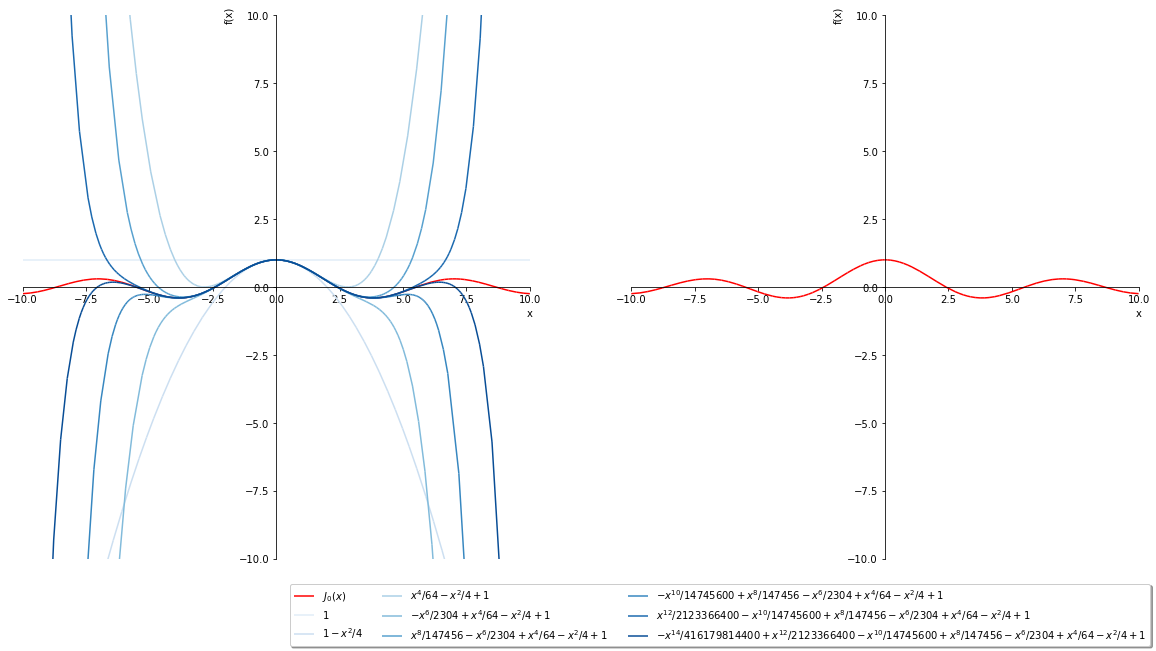

In [6]:
B = sm.besselj(0,x)
taylorplot(B, 14, 10)

In these graphs we show the Taylor polynomials (centered at $a=0$ here), using the darker shade to denote to the higher degree polynomial $T_n(x)$. The plot on the right shows $J_0(x)$ itself.

----

Next, let us do the same with $\sin(x)$. We plot its Taylor polynomials at 0 up to degree 13 in the box `[-10,10]` by `[-10,10]`.

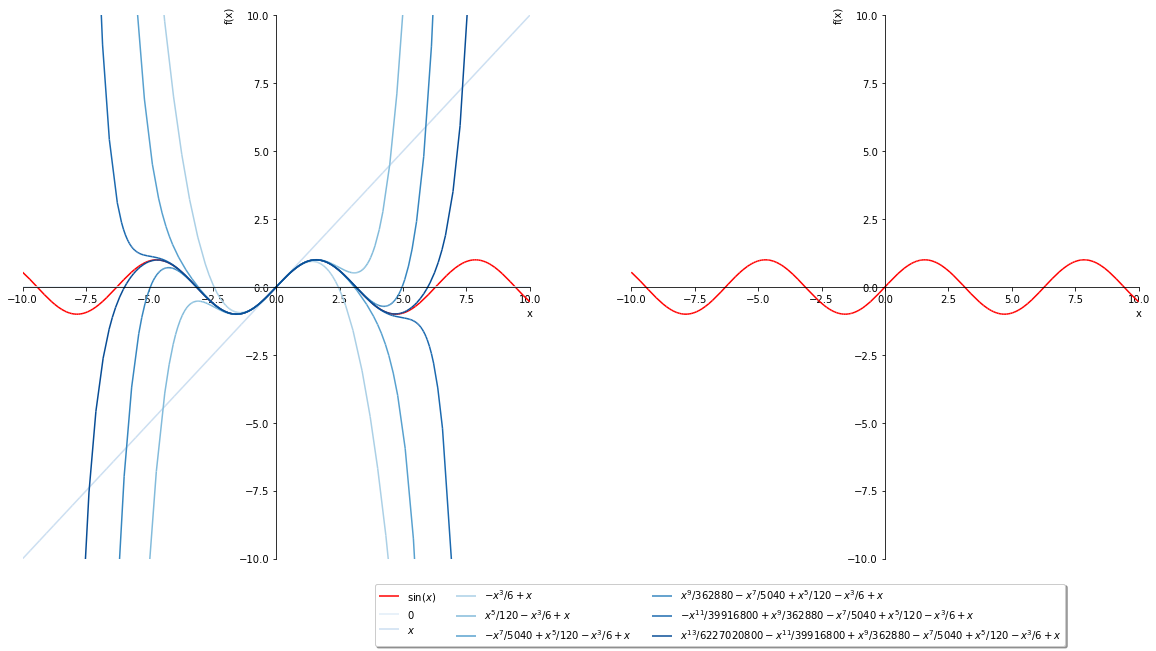

In [7]:
S = sm.sin(x)
taylorplot(S, 13,10)

---

Finally, let us look at two examples in which the Maclaurin series of a function does not converge for all `x`. The first example is $ 1/(1-x) $; we will plot its Taylor polynomials up to degree 10 in the square box `[-6,6]` by `[-6,6]`.

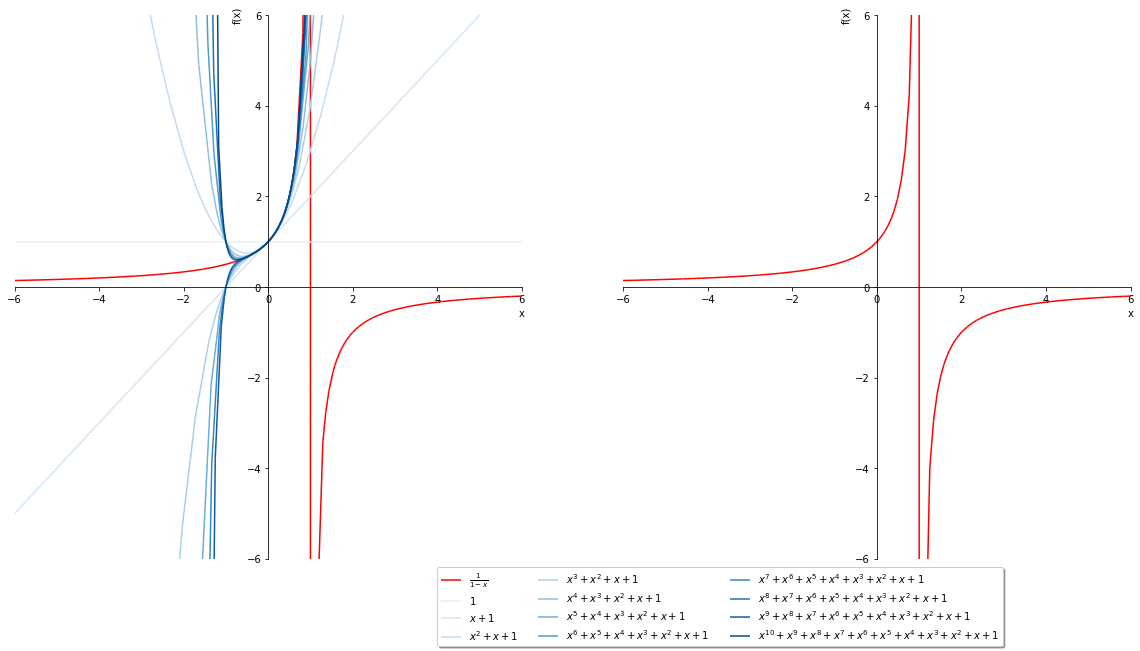

In [8]:
f1 = 1/(1-x)
taylorplot(f1,10,6)

Observe how the polynomials $ T_n $ diverge away from the graph of the function `f1` when $x=-1$, even though the function does not have a singularity there. This is of course because the radius of convergence of the geometric series $$ \sum_{n=0}^\infty x^n $$ is $1$. Since the interval of convergence of a series must be symmetric, divergence of the series at $ x = 1 $, where the function `f1` has a singularity, means that the series must also diverge at $x = -1$.

---

The following example is even more subtle. The function we look at here, `f2`$= 1/(1+x^2) $, does not exhibit any singularities at all! On the other hand, its Maclaurin series  $$ \sum_{n=0}^\infty\, (-1)^n x^{2n} $$ diverges as soon as $|x|\geq 1 $. Let us plot the Taylor polynomials at $ a = 0 $ up to the degree  $ n = 20$.

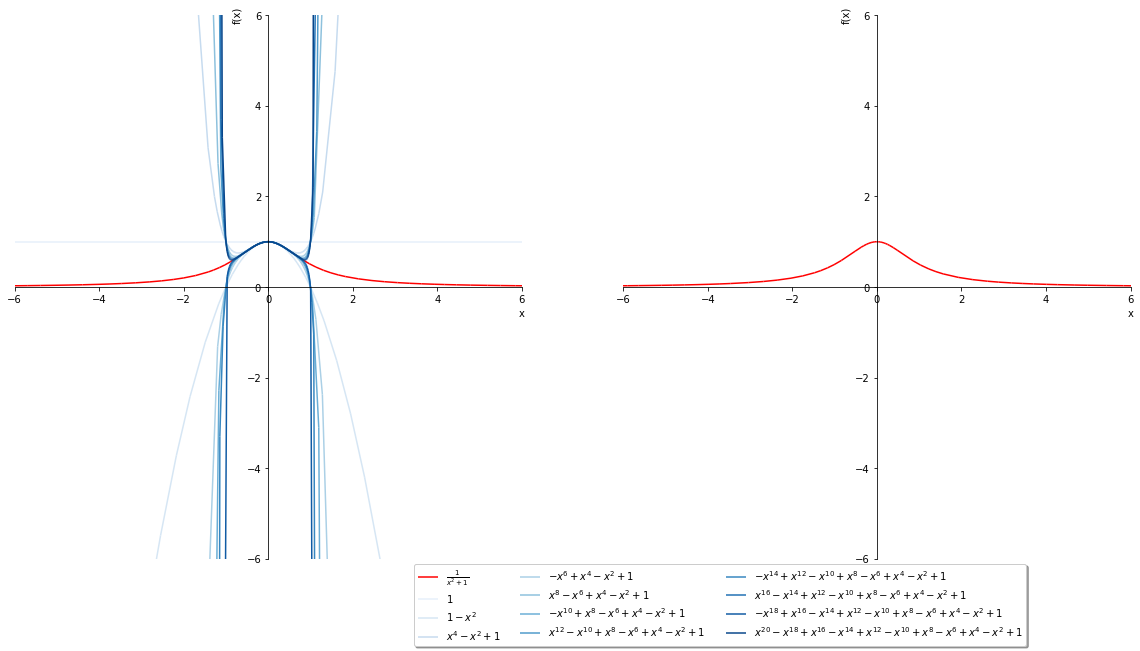

In [9]:
f2 = 1/(1+x**2)
taylorplot(f2,20,6)

**Outside of Calc2:** It turns out, to understand the reason for such behavior of this series, one has to extend the function `f2`$=1/(1+x^2)$ to *complex numbers*, where for $x = i$, our function `f2` has a singularity (the complex number $i$ is such that $i^2+1 = 0$, turning the denominator of `f2` into $0$). In the complex plane, series converge on *discs* instead of intervals, so because the function `f2` has a singularity at the point $0+i\,1$, its series centered at $a=0$ will have the radius of convergence equal to $1$. We show this relation in the following graph. In it, a point $(x,y)$ in the plane stands for the complex number $z = x+ iy$.

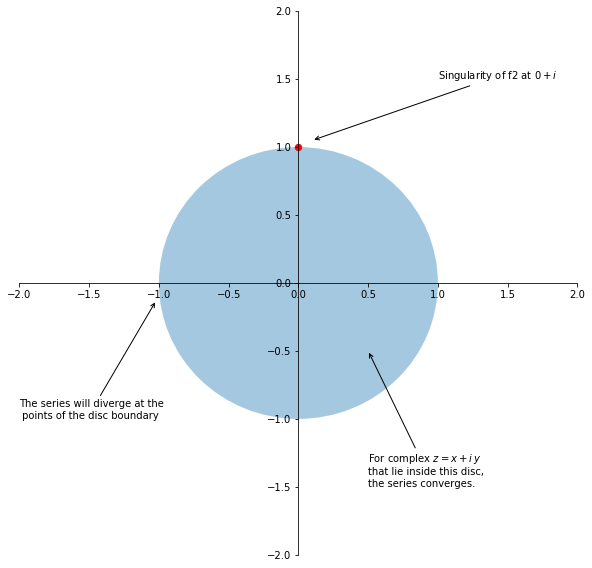

In [10]:
    fig, ax = plt.subplots(figsize=(10,10))
    circle =  matplotlib.patches.Circle ((0, 0), 1, edgecolor='none',alpha=0.5)
    p = matplotlib.collections.PatchCollection([circle], alpha=0.4)
    ax.add_collection(p);
    ax.scatter([0.0],[1.0],marker='o',c='r',s=40)    
    ax.annotate('Singularity of f2 at $0+i$', xy=(0.1, 1.05), xytext=(1, 1.5),
            arrowprops=dict(arrowstyle="->")
            )
    ax.annotate('For complex $z= x + i\,y$\nthat lie inside this disc,\nthe series converges.', xy=(0.5, -0.5), xytext=(0.5, -1.5),
        arrowprops=dict(arrowstyle="->")
        )
    ax.annotate('The series will diverge at the\n points of the disc boundary', xy=(-1.02, -0.13), xytext=(-2, -1),
            arrowprops=dict(arrowstyle="->")
            )
    # This adjusts the position of the axes
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    plt.ylim(-2,2)
    plt.xlim(-2,2)
    plt.show()